In [1]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import model_from_json

from skimage.util import invert
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
img0 = X_train[0]
img0.shape

(28, 28)

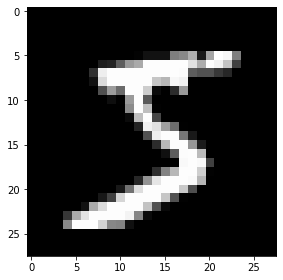

In [5]:
io.imshow(img0)

In [6]:
img0.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
K.image_data_format()

'channels_last'

In [8]:
img_rows, img_cols = 28,28

In [9]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [12]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [16]:
batch_size = 128
epochs = 12

model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 410s 7ms/step - loss: 0.2731 - accuracy: 0.9164 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 2/12
60000/60000 [==============================] - 417s 7ms/step - loss: 0.0919 - accuracy: 0.9734 - val_loss: 0.0435 - val_accuracy: 0.9860
Epoch 3/12
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0660 - accuracy: 0.9804 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 4/12
60000/60000 [==============================] - 418s 7ms/step - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0338 - val_accuracy: 0.9886
Epoch 5/12
60000/60000 [==============================] - 423s 7ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0347 - val_accuracy: 0.9890
Epoch 6/12
60000/60000 [==============================] - 418s 7ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0295 - val_accuracy: 0.9896
Epoch 7/12
60000/60000 [==============================] - 417s

In [18]:
print('Test loss: ', score[0])
print('Test accuracy', score[1])

Test loss:  0.026493493513571595
Test accuracy 0.9914000034332275


In [19]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('model.h5')
print('Saved model to disk')

Saved model to disk


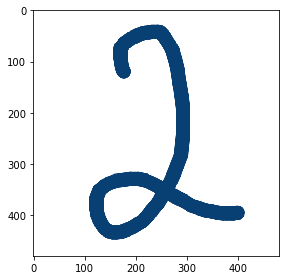

In [33]:
imgTest = io.imread('drawing.png')
io.imshow(imgTest)
io.show()

In [34]:
imgTest.shape

(480, 480, 4)

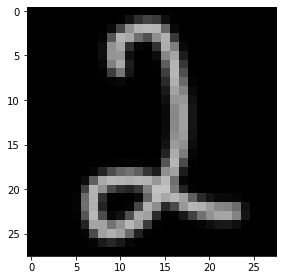

In [35]:
imgTest = imgTest[:,:,:3]
grayImg = rgb2gray(imgTest)

resizedImg = resize(grayImg, (28,28))
finalImg = invert(resizedImg)
finalImg = finalImg.reshape(28,28,1)
io.imshow(finalImg)
io.show()

In [36]:
finalImg.shape

(28, 28, 1)

In [37]:
model_input = finalImg.reshape(1,28,28,1)

In [38]:
model_input.shape

(1, 28, 28, 1)

In [39]:
X_test.shape

(10000, 28, 28, 1)

In [40]:
np.argmax(model.predict(model_input))

2

In [41]:
model.predict(model_input)

array([[8.0371528e-06, 3.0173694e-03, 9.9450642e-01, 2.2125833e-03,
        5.7954844e-06, 2.8985008e-07, 1.9502976e-07, 1.9770800e-04,
        5.1156578e-05, 4.9529274e-07]], dtype=float32)

In [42]:
img1 = X_test[1]

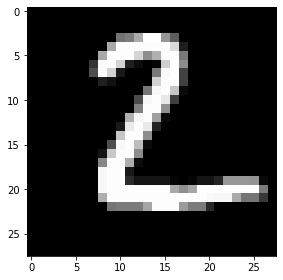

In [43]:
io.imshow(img1)

In [154]:
np.argmax(model.predict(img1.reshape(1,28,28,1)))

2

In [186]:
with open('model/model.json', 'r') as m:
    loaded_model_json = m.read()
loaded_model = model_from_json(loaded_model_json)

In [188]:
loaded_model.load_weights('model/model.h5')

In [192]:
np.argmax(loaded_model.predict(model_input))

8